In [1]:
import warnings
warnings. simplefilter(action='ignore', category=Warning)
import pandas as pd
import numpy as np
import pandas_ta as ta
import plotly.graph_objects as go
from plotly.subplots import make_subplots as ms
from plotly.offline import iplot
import backtesting
from backtesting import Strategy, Backtest
from tabulate import tabulate

Loading BokehJS ...

In [2]:
df4 = pd.read_csv('EURUSD_4Hour.csv')
dfd = pd.read_csv('EURUSD_1D.csv')

In [3]:
def drop_rows_where_zero_in_one_column(data, col_name):
    data = data[data[col_name]!=0]
    data = data.reset_index(drop=True)
    return data

In [4]:
df4 = drop_rows_where_zero_in_one_column(df4, 'Volume')

In [5]:
df4

,Gmt time,Open,High,Low,Close,Volume
0,01.01.2014 20:00:00.000,1.37553,1.37720,1.37390,1.37653,2724.8900
1,02.01.2014 00:00:00.000,1.37653,1.37746,1.37507,1.37660,7012.2300
2,02.01.2014 04:00:00.000,1.37661,1.37661,1.37250,1.37320,14175.5202
3,02.01.2014 08:00:00.000,1.37319,1.37421,1.36838,1.36892,50431.0206
4,02.01.2014 12:00:00.000,1.36892,1.36892,1.36294,1.36576,79223.8613
...,...,...,...,...,...,...
17214,06.09.2024 08:00:00.000,1.11157,1.11207,1.11026,1.11069,35319.1900
17215,06.09.2024 12:00:00.000,1.11070,1.11556,1.10656,1.10856,203661.3896
17216,06.09.2024 16:00:00.000,1.10854,1.10895,1.10695,1.10884,55519.9000
17217,06.09.2024 20:00:00.000,1.10886,1.10887,1.10822,1.10825,7471.4300


In [6]:
dfd = drop_rows_where_zero_in_one_column(dfd, 'Volume')

In [7]:
dfd

,Gmt time,Open,High,Low,Close,Volume
0,01.01.2014 00:00:00.000,1.37553,1.37720,1.37390,1.37653,2724.8899
1,02.01.2014 00:00:00.000,1.37653,1.37746,1.36294,1.36653,199117.5313
2,03.01.2014 00:00:00.000,1.36653,1.36719,1.35820,1.35874,193632.8438
3,05.01.2014 00:00:00.000,1.35935,1.36005,1.35890,1.35955,2823.0801
4,06.01.2014 00:00:00.000,1.35957,1.36527,1.35715,1.36296,189223.7344
...,...,...,...,...,...,...
3337,03.09.2024 00:00:00.000,1.10671,1.10702,1.10263,1.10485,254620.5300
3338,04.09.2024 00:00:00.000,1.10485,1.10951,1.10400,1.10801,213760.7301
3339,05.09.2024 00:00:00.000,1.10800,1.11197,1.10746,1.11110,235680.2400
3340,06.09.2024 00:00:00.000,1.11111,1.11556,1.10656,1.10825,353066.7396


In [8]:
dfd['ema5'] = ta.ema(close=dfd['Close'], length=5)
dfd['ema25'] = ta.ema(close=dfd['Close'], length=25)
dfd['ema30'] = ta.ema(close=dfd['Close'], length=30)
dfd['ema50'] = ta.ema(close=dfd['Close'], length=50)
dfd['ema200'] = ta.ema(close=dfd['Close'], length=200)
dfd[['macd', 'hist', 's_line']] = ta.macd(close=dfd['Close'], fast=12, slow=26, signal=9)

In [9]:
df4['ema5'] = ta.ema(close=df4['Close'], length=5)
df4['ema8'] = ta.ema(close=df4['Close'], length=8)
df4['ema25'] = ta.ema(close=df4['Close'], length=25)
df4['ema30'] = ta.ema(close=df4['Close'], length=30)
df4[['macd', 'hist', 's_line']] = ta.macd(close=df4['Close'], fast=12, slow=26, signal=9)

In [10]:
dfd.dropna(subset=['s_line'], inplace=True)
dfd.reset_index(drop=True, inplace=True)

In [11]:
df4.dropna(subset=['s_line'], inplace=True)
df4.reset_index(drop=True, inplace=True)

In [12]:
df4

,Gmt time,Open,High,Low,Close,Volume,ema5,ema8,ema25,ema30,macd,hist,s_line
0,09.01.2014 04:00:00.000,1.35791,1.36013,1.35750,1.36010,18944.9105,1.359058,1.359408,1.361763,1.362401,-0.002102,0.000120,-0.002222
1,09.01.2014 08:00:00.000,1.36009,1.36217,1.35931,1.36017,49411.8106,1.359429,1.359577,1.361640,1.362257,-0.001915,0.000245,-0.002161
2,09.01.2014 12:00:00.000,1.36010,1.36330,1.35480,1.35850,90896.0508,1.359119,1.359338,1.361399,1.362015,-0.001880,0.000224,-0.002105
3,09.01.2014 16:00:00.000,1.35849,1.35954,1.35809,1.35901,29326.6406,1.359083,1.359265,1.361215,1.361821,-0.001790,0.000251,-0.002042
4,09.01.2014 20:00:00.000,1.35901,1.36106,1.35876,1.36062,17111.0901,1.359595,1.359566,1.361169,1.361743,-0.001571,0.000376,-0.001948
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17181,06.09.2024 08:00:00.000,1.11157,1.11207,1.11026,1.11069,35319.1900,1.110771,1.110252,1.108676,1.108637,0.000935,0.000612,0.000323
17182,06.09.2024 12:00:00.000,1.11070,1.11556,1.10656,1.10856,203661.3896,1.110034,1.109876,1.108667,1.108632,0.000783,0.000368,0.000415
17183,06.09.2024 16:00:00.000,1.10854,1.10895,1.10695,1.10884,55519.9000,1.109636,1.109646,1.108680,1.108645,0.000677,0.000210,0.000467
17184,06.09.2024 20:00:00.000,1.10886,1.10887,1.10822,1.10825,7471.4300,1.109174,1.109335,1.108647,1.108620,0.000540,0.000058,0.000482


In [13]:
dfd

,Gmt time,Open,High,Low,Close,Volume,ema5,ema25,ema30,ema50,ema200,macd,hist,s_line
0,09.02.2014 00:00:00.000,1.36165,1.36269,1.36160,1.36186,3053.4099,1.359239,1.359148,1.360541,NaN,NaN,-0.001486,0.001116,-0.002602
1,10.02.2014 00:00:00.000,1.36185,1.36514,1.36184,1.36451,143303.6250,1.360996,1.359561,1.360797,NaN,NaN,-0.000846,0.001404,-0.002251
2,11.02.2014 00:00:00.000,1.36451,1.36829,1.36295,1.36366,182680.5000,1.361884,1.359876,1.360981,NaN,NaN,-0.000403,0.001478,-0.001881
3,12.02.2014 00:00:00.000,1.36366,1.36527,1.35623,1.35877,197226.8281,1.360846,1.359791,1.360839,NaN,NaN,-0.000442,0.001151,-0.001593
4,13.02.2014 00:00:00.000,1.35876,1.36918,1.35855,1.36759,202744.2031,1.363094,1.360391,1.361274,NaN,NaN,0.000236,0.001464,-0.001227
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3304,03.09.2024 00:00:00.000,1.10671,1.10702,1.10263,1.10485,254620.5300,1.106713,1.104511,1.102968,1.097865,1.086377,0.003769,-0.001709,0.005477
3305,04.09.2024 00:00:00.000,1.10485,1.10951,1.10400,1.10801,213760.7301,1.107146,1.104780,1.103294,1.098263,1.086592,0.003493,-0.001587,0.005081
3306,05.09.2024 00:00:00.000,1.10800,1.11197,1.10746,1.11110,235680.2400,1.108464,1.105266,1.103797,1.098766,1.086836,0.003484,-0.001277,0.004761
3307,06.09.2024 00:00:00.000,1.11111,1.11556,1.10656,1.10825,353066.7396,1.108392,1.105496,1.104085,1.099138,1.087049,0.003209,-0.001241,0.004451


In [14]:
def l_ema_and_h_ema(data):
    l_ema = np.zeros(len(data))
    h_ema = np.zeros(len(data))
    for i in range(len(data)):
        if data['ema25'][i] < data['ema30'][i]:
            l_ema[i] = data['ema25'][i]
            h_ema[i] = data['ema30'][i]
        elif data['ema30'][i] < data['ema25'][i]:
            l_ema[i] = data['ema30'][i]
            h_ema[i] = data['ema25'][i]
        else:
            l_ema[i] = data['ema30'][i]
            h_ema[i] = data['ema25'][i]
    return l_ema, h_ema

In [15]:
l_ema , h_ema = l_ema_and_h_ema(dfd)
dfd['l_ema'] = l_ema
dfd['h_ema'] = h_ema

In [16]:
l_ema , h_ema = l_ema_and_h_ema(df4)
df4['l_ema'] = l_ema
df4['h_ema'] = h_ema

## Calculating Slope of EMAS

In [17]:
def calculate_ema_slope(ema: pd.Series, slope_period=5, round_decimals: int = np.nan):
  # ema = calculate_ema(high, low, close, period)
  
  # Convert to numpy array for faster operations
  ema_values = ema.values
  
  # Create a 2D array of rolling windows
  rolling_windows = np.lib.stride_tricks.sliding_window_view(ema_values, slope_period)

  def vectorized_slope(y: np.ndarray, period: int) -> np.ndarray:
    x = np.arange(period)
    x_mean = (period - 1) / 2
    y_mean = np.mean(y, axis=1)
    
    numerator = np.sum(y * (x - x_mean), axis=1)
    denominator = np.sum((x - x_mean)**2)
    
    return numerator / denominator
  
  # Calculate slopes for all windows at once
  slopes = vectorized_slope(rolling_windows, slope_period)
  
  # Pad the result with NaNs to match the original series length
  padded_slopes = np.pad(slopes, (slope_period - 1, 0), constant_values=np.nan)
  
  ema_slope = pd.Series(padded_slopes, index=ema.index)
  
  if not np.isnan(round_decimals):
    ema_slope = ema_slope.round(round_decimals)
  
  return ema_slope

In [18]:
dfd['ema5_slope'] = calculate_ema_slope(dfd['ema5'], round_decimals=5)
dfd['ema25_slope'] = calculate_ema_slope(dfd['ema25'], round_decimals=5)
dfd['ema30_slope'] = calculate_ema_slope(dfd['ema30'], round_decimals=5)

In [19]:
def get_buy_condition(data):
    buy = np.full(len(data), 0)
    for i in range(len(data)):
        if data['ema50'][i] != np.nan and data['ema25'][i] > data['ema50'][i] and data['ema30'][i] > data['ema50'][i]\
        and data['ema25_slope'][i] > 0 and data['ema30_slope'][i] > 0 and data['ema5'][i] > data['h_ema'][i] and data['macd'][i] > data['s_line'][i]:
        # and data['Close'][i] > data['Open'][i]:
            buy[i] = 1
    buy = pd.Series(buy)
    return buy

In [20]:
def get_sell_condition(data):
    sell = np.full(len(data), 0)
    for i in range(len(data)):
        if data['ema50'][i] != np.nan and data['ema25'][i] < data['ema50'][i] and data['ema30'][i] < data['ema50'][i]\
        and data['ema25_slope'][i] < 0 and data['ema30_slope'][i] < 0 and data['ema5'][i] < data['l_ema'][i] and data['macd'][i] < data['s_line'][i]:
         # and data['Close'][i] < data['Open'][i]:
            sell[i] = 1
    sell = pd.Series(sell)
    return sell

In [21]:
buy = get_buy_condition(dfd)
dfd['buy'] = buy

In [22]:
sell = get_sell_condition(dfd)
dfd['sell'] = sell

In [23]:
print(len(dfd[dfd['buy']==1]))
print(len(dfd[dfd['sell']==1]))

641
834


##### Filtering Consecutive Signals

In [24]:
def filtering_consecutive_signals(data, signals):
    for signal in signals:
        dynamic_vars = {f't_{signal}': np.zeros(len(data)), f'lag_{signal}': np.zeros(len(data))}

        for i in range(len(data)-1):
            if data[signal][i]==1 and data[signal][i+1]==1:
                dynamic_vars[f'lag_{signal}'][i+1] = 1

        data[f'lag_{signal}'] = dynamic_vars[f'lag_{signal}']
        data[f'lag_{signal}'] = data[f'lag_{signal}'].astype(pd.Int32Dtype())
        
        for i in range(len(data)):
            if data[signal][i] != data[f'lag_{signal}'][i]:
                dynamic_vars[f't_{signal}'][i] = 1

        data[f't_{signal}'] = dynamic_vars[f't_{signal}']
        data[f't_{signal}'] = data[f't_{signal}'].astype(pd.Int32Dtype())
        data = data.drop(f'lag_{signal}', axis=1)

    return data

In [25]:
dfd = filtering_consecutive_signals(dfd, ['buy', 'sell'])

In [26]:
print(len(dfd[dfd['t_buy'] == 1]))
print(len(dfd[dfd['t_sell'] == 1]))

69
87


In [59]:
def b_pointpos(data):
    if data['t_buy']==1:
        return data['Low']+1e-3
    else:
        return np.nan

def s_pointpos(data):
    if data['t_sell']==1:
        return data['High']-1e-3
    else:
        return np.nan

def plot_chart_with_signals(data):
    fig = ms(rows=2, cols=1)
    fig.add_trace(go.Candlestick(x=data.index, open=data['Open'], high=data['High'], low=data['Low'], close=data['Close'], name='OHLC'), row=1, col=1)
    fig.add_trace(go.Scatter(x=data.index, y=data['ema5'], mode='lines', line=dict(color='pink', width=1), name='5 EMA'), row=1, col=1)
    fig.add_trace(go.Scatter(x=data.index, y=data['ema25'], mode='lines', line=dict(color='darkgreen', width=1), name ='25 EMA'), row=1, col=1)
    fig.add_trace(go.Scatter(x=data.index, y=data['ema30'], mode='lines', line=dict(color='darkorchid', width=1), name='30 EMA'), row=1, col=1)
    fig.add_trace(go.Scatter(x=data.index, y=data['ema50'], mode='lines', line=dict(color='aqua', width=2), name='30 EMA'), row=1, col=1)
    fig.add_trace(go.Scatter(x=data.index, y=data['ema200'], mode='lines', line=dict(color='darkgrey', width=2), name='30 EMA'), row=1, col=1)
    fig.add_trace(go.Scatter(x=data.index, y=data['b_pointpos'], mode='markers', marker=dict(symbol='arrow-up', color='lime', size=15),\
                             name='Buys'), row=1, col=1)
    fig.add_trace(go.Scatter(x=data.index, y=data['s_pointpos'], mode='markers', marker=dict(symbol='arrow-down', color='orange', size=15),\
                             name='Sells'), row=1, col=1)
    # fig.add_trace(go.Scatter(x=data.index, y=data['buy_sl'], mode='lines', line=dict(color='green', width=2, dash='dot')), row=1, col=1)
    # fig.add_trace(go.Scatter(x=data.index, y=data['sell_sl'], mode='lines', line=dict(color='red', width=2, dash='dot')), row=1, col=1)
    fig.add_trace(go.Scatter(x=data.index, y=data['macd'], mode='lines', line=dict(color='aqua', width=2), name='MACD'), row=2, col=1)
    fig.add_trace(go.Scatter(x=data.index, y=data['s_line'], mode='lines', line=dict(color='red', width=2), name='Signal Line'), row=2, col=1)
    fig.add_hline(y=0, line=dict(color='darkgrey', width=1, dash='dash'), row=2, col=1)
    fig.update_layout(width=1200, height=900, margin=dict(t=0, l=0, b=0, r=0), paper_bgcolor='black', plot_bgcolor='black', hovermode='x unified',\
                     hoverlabel=dict(bgcolor="white", font_size=14, font_family="Rockwell", font_color='black'))
    fig.update_xaxes(gridcolor='black', zerolinecolor='black')
    fig.update_yaxes(gridcolor='black', zerolinecolor='black')
    iplot(fig)

In [60]:
dfd['b_pointpos'] = dfd.apply(lambda row: b_pointpos(row), axis=1)
dfd['s_pointpos'] = dfd.apply(lambda row: s_pointpos(row), axis=1)

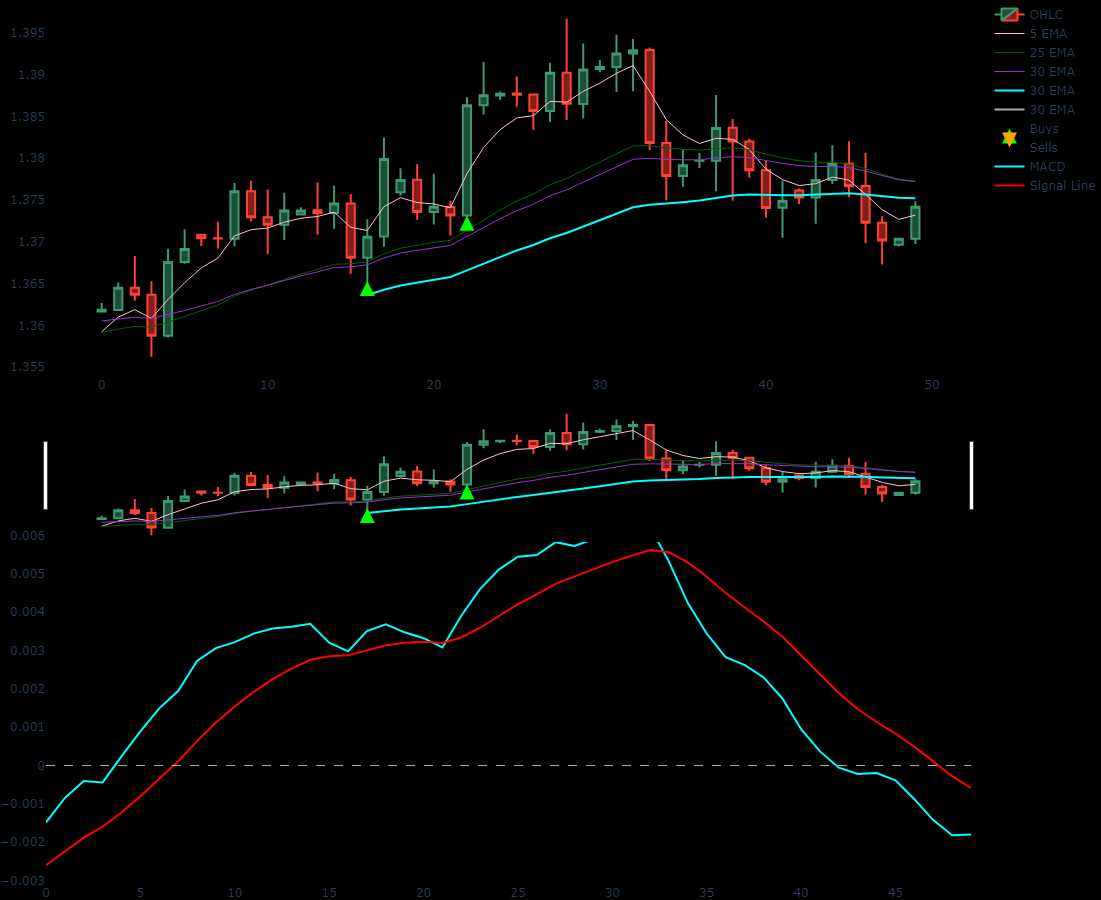

In [61]:
df1 = dfd[:50]
plot_chart_with_signals(df1)

In [30]:
df4 = df4.rename(columns={'Gmt time': 'datetime'})

In [31]:
# def find_pivot(df, l, n):
#     if l-n < 0 or l >= len(df1):
#         return 0
    
#     pividlow=1
#     pividhigh=1
#     for i in range(l-n, l+1):
#         if(df.Low[l]>df.Low[i]):
#             pividlow=0
#         if(df.High[l]<df.High[i]):
#             pividhigh=0
#     if pividlow and pividhigh:
#         return 3
#     elif pividlow:
#         return 1
#     elif pividhigh:
#         return 2
#     else:
#         return 0

In [32]:
def check_pivot(df, back_candles):
    """
    Check if the current candle's high or low is a pivot among the given number of backcandles.

    Parameters:
    df (pandas.DataFrame): DataFrame containing the chart data
    back_candles (int): Number of candles to look back

    Returns:
    pandas.Series: pivot values (2 for pivot high, 1 for pivot low, 0 otherwise)
    """

    # Create a new column to store the pivot values
    df['pivot'] = 0

    # Loop through each candle
    for i in range(len(df)):
        # Check if we have enough candles to look back
        if i >= back_candles:
            # Get the current candle and the previous candles
            current_candle = df.iloc[i]
            highest_high_back = max(df["High"][i-back_candles : i])
            lowest_low_back = min(df["Low"][i-back_candles : i])
            
                
            # Check if the current candle's high is the pivot high and the same candle's low is the pivot low
            if current_candle['High'] > highest_high_back\
            and current_candle['Low'] < lowest_low_back:
                df.at[i, 'pivot'] = 3
                
            # Check if the current candle's high is the pivot high
            elif current_candle['High'] > highest_high_back:
                df.at[i, 'pivot'] = 2

            # Check if the current candle's low is the pivot low
            elif current_candle['Low'] < lowest_low_back:
                df.at[i, 'pivot'] = 1
            else:
                df.at[i, 'pivot'] = 0

    return df['pivot']

In [33]:
df4['pivot'] = check_pivot(df=df4, back_candles=5)

##### Filtering consecutive pivot points

In [34]:
def filtering_consecutive_pivots(data):
    t_pivot = np.zeros(len(data))

    for i in range(1, len(data)-1):
        if data['pivot'][i-1] == data['pivot'][i]:
            t_pivot[i] = 0
        elif data['pivot'][i-1] != data['pivot'][i]:
            t_pivot[i-1] = data['pivot'][i-1]

    data['t_pivot'] = t_pivot
    data['t_pivot'] = data['t_pivot'].astype(pd.Int32Dtype())

    return data

In [35]:
df4 = filtering_consecutive_pivots(df4)

In [36]:
print(df4[:30])

                   datetime     Open     High      Low    Close      Volume  \
0   09.01.2014 04:00:00.000  1.35791  1.36013  1.35750  1.36010  18944.9105   
1   09.01.2014 08:00:00.000  1.36009  1.36217  1.35931  1.36017  49411.8106   
2   09.01.2014 12:00:00.000  1.36010  1.36330  1.35480  1.35850  90896.0508   
3   09.01.2014 16:00:00.000  1.35849  1.35954  1.35809  1.35901  29326.6406   
4   09.01.2014 20:00:00.000  1.35901  1.36106  1.35876  1.36062  17111.0901   
5   10.01.2014 00:00:00.000  1.36062  1.36136  1.36028  1.36113  11484.1502   
6   10.01.2014 04:00:00.000  1.36113  1.36196  1.36052  1.36122  16681.5100   
7   10.01.2014 08:00:00.000  1.36123  1.36135  1.35883  1.35957  38921.8095   
8   10.01.2014 12:00:00.000  1.35958  1.36869  1.35710  1.36724  86054.4297   
9   10.01.2014 16:00:00.000  1.36725  1.36757  1.36560  1.36604  33304.6504   
10  10.01.2014 20:00:00.000  1.36606  1.36704  1.36587  1.36661   8755.3501   
11  12.01.2014 20:00:00.000  1.36783  1.36786  1.366

In [55]:
def pointpos1(data):
    if data['t_pivot']==1:
        return data['Low']-1e-3
    else:
        return np.nan

def pointpos2(data):
    if data['t_pivot']==2:
        return data['High']+1e-3
    else:
        return np.nan

def pointpos3(data):
    if data['t_pivot']==3:
        return data['High']+1e-3
    else:
        return np.nan

def plot_chart_with_pivots(data):
    fig = ms(rows=2, cols=1)
    fig.add_trace(go.Candlestick(x=data.index, open=data['Open'], high=data['High'], low=data['Low'], close=data['Close'], name='OHLC'), row=1, col=1)
    fig.add_trace(go.Scatter(x=data.index, y=data['ema5'], mode='lines', line=dict(color='pink', width=1), name='5 EMA'), row=1, col=1)
    fig.add_trace(go.Scatter(x=data.index, y=data['ema25'], mode='lines', line=dict(color='darkgreen', width=1), name ='25 EMA'), row=1, col=1)
    fig.add_trace(go.Scatter(x=data.index, y=data['ema30'], mode='lines', line=dict(color='darkorchid', width=1), name='30 EMA'), row=1, col=1)
    # fig.add_trace(go.Scatter(x=data.index, y=data['ema50'], mode='lines', line=dict(color='aqua', width=2), name='30 EMA'), row=1, col=1)
    # fig.add_trace(go.Scatter(x=data.index, y=data['ema200'], mode='lines', line=dict(color='darkgrey', width=2), name='30 EMA'), row=1, col=1)
    fig.add_trace(go.Scatter(x=data.index, y=data['pointpos1'], mode='markers', marker=dict(symbol='circle', color='lime', size=8),\
                             name='Pivots'), row=1, col=1)
    fig.add_trace(go.Scatter(x=data.index, y=data['pointpos2'], mode='markers', marker=dict(symbol='circle', color='orange', size=8),\
                             name='Pivots'), row=1, col=1)
    fig.add_trace(go.Scatter(x=data.index, y=data['pointpos3'], mode='markers', marker=dict(symbol='arrow-down', color='orange', size=8),\
                             name='Pivots'), row=1, col=1)
    # fig.add_trace(go.Scatter(x=data.index, y=data['buy_sl'], mode='lines', line=dict(color='green', width=2, dash='dot')), row=1, col=1)
    # fig.add_trace(go.Scatter(x=data.index, y=data['sell_sl'], mode='lines', line=dict(color='red', width=2, dash='dot')), row=1, col=1)
    fig.add_trace(go.Scatter(x=data.index, y=data['macd'], mode='lines', line=dict(color='aqua', width=2), name='MACD'), row=2, col=1)
    fig.add_trace(go.Scatter(x=data.index, y=data['s_line'], mode='lines', line=dict(color='red', width=2), name='Signal Line'), row=2, col=1)
    fig.add_hline(y=0, line=dict(color='darkgrey', width=1, dash='dash'), row=2, col=1)
    fig.update_layout(width=1200, height=900, margin=dict(t=0, l=0, b=0, r=0), paper_bgcolor='black', plot_bgcolor='black', hovermode='x unified',\
                     hoverlabel=dict(bgcolor="white", font_size=14, font_family="Rockwell", font_color='black'))
    fig.update_xaxes(gridcolor='black', zerolinecolor='black')
    fig.update_yaxes(gridcolor='black', zerolinecolor='black')
    iplot(fig)

In [56]:
df4['pointpos1'] = df4.apply(lambda row: pointpos1(row), axis=1)
df4['pointpos2'] = df4.apply(lambda row: pointpos2(row), axis=1)
df4['pointpos3'] = df4.apply(lambda row: pointpos3(row), axis=1)

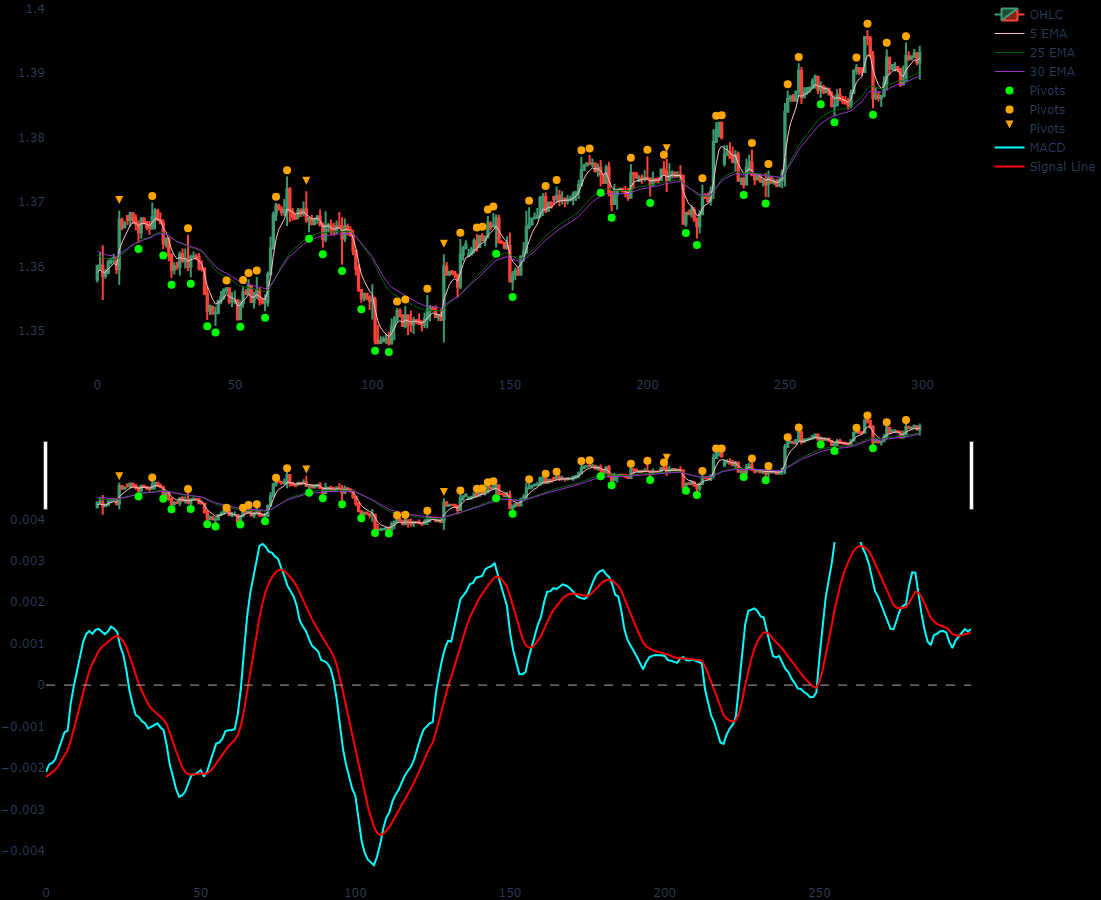

In [57]:
df4l = df4[:300]
plot_chart_with_pivots(df4l)